In [1]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [2]:
# Download data from Yahoo Finance
# df = yf.download("^NSEI", start="2020-01-01", end="2024-01-09")
df = yf.download("AAPL", start="2020-01-01", end="2024-01-09")
# df = yf.download("BTC-USD", start="2020-01-01", end="2021-09-01")

# Change column names from upper to lower case
df. columns = df.columns.str.lower()

# Delete the adj close column
df = df.drop(columns=["adj close"])

# df.head(3)

[*********************100%%**********************]  1 of 1 completed


Moving Average Crossover:

Concept:
 
This strategy involves using two moving averages of different periods (e.g., 50-day and 200-day moving averages). When the shorter-term moving average crosses above the longer-term moving average, it generates a buy signal, indicating a potential uptrend. Conversely, when the shorter-term moving average crosses below the longer-term moving average, it generates a sell signal, indicating a potential downtrend.

Implementation: You can implement this strategy by calculating the moving averages and monitoring their crossovers. For example, if the 50-day moving average crosses above the 200-day moving average, generate a buy signal, and vice versa.

In [3]:
# create a df_x_ema to contain a subset of df
df_x_ema = df[-150: -1]

fast_ma = 8
slow_ma = 21

# Add column for fast moving average (ema_fast) and slow moving average (ema_slow)
df_x_ema["ema_fast"] = ta.ema(df_x_ema.close, length=fast_ma)
df_x_ema["ema_slow"] = ta.ema(df_x_ema.close, length=slow_ma)

# Remove rows with missing values
df_x_ema = df_x_ema.dropna()

# Show first few lines
# df_x_ema.head()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\3441452431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["ema_fast"] = ta.ema(df_x_ema.close, length=fast_ma)
C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\3441452431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["ema_slow"] = ta.ema(df_x_ema.close, length=slow_ma)


In [4]:
# If fast moving average is crosses over the slow moving average the buy signal must be true
df_x_ema["buy_signal"] = (df_x_ema["ema_fast"] > df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) <= df_x_ema["ema_slow"].shift(1))
# If fast moving average is crosses below the slow moving average the sell signal must be true
df_x_ema["sell_signal"] = (df_x_ema["ema_fast"] < df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) >= df_x_ema["ema_slow"].shift(1))

# when the buy signal is true populate the price in buy_numeric column
df_x_ema["buy_numeric"] = np.where(df_x_ema["buy_signal"],df_x_ema["ema_slow"], np.nan)
# when the sell signal is true populate the price in sell_numeric column
df_x_ema["sell_numeric"] = np.where(df_x_ema["sell_signal"],df_x_ema["ema_slow"], np.nan)

# Show first few lines
# df_x_ema.head()

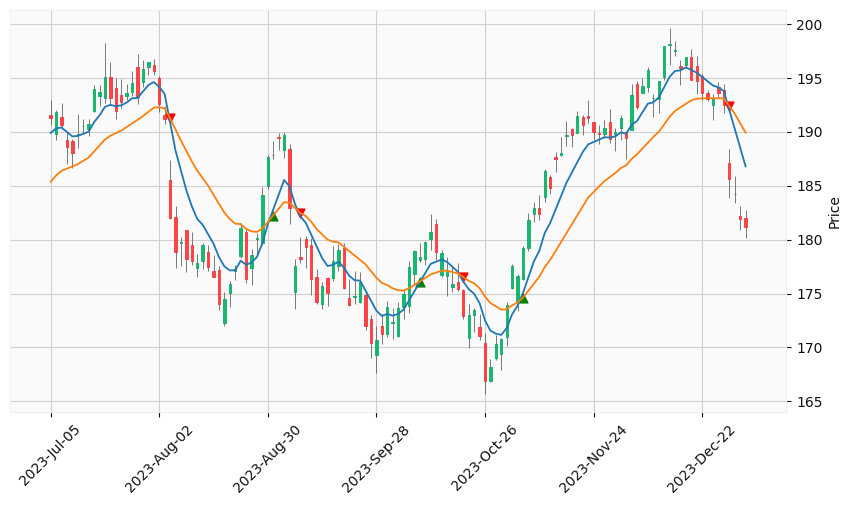

In [5]:
adp = [
    # Plot the fast moving average
    mpf.make_addplot(df_x_ema["ema_fast"], type="line"), 
    # Plot the slow moving average
    mpf.make_addplot(df_x_ema["ema_slow"], type="line"),
    # Plot the buy signal 
    mpf.make_addplot(df_x_ema["buy_numeric"], type="scatter", marker="^", markersize=40, color="green"),
    # Plot the sell signal
    mpf.make_addplot(df_x_ema["sell_numeric"], type="scatter", marker="v", markersize=40, color="red")
    ]
# Plot the candle sticks, fast ma and slow ma, trading signal markers
mpf.plot(df_x_ema, type="candle", figratio=(15,8), addplot=adp, style="yahoo")

In [6]:
# These are the dates and prices on which to buy
df_x_ema.loc[df_x_ema["buy_signal"], "ema_slow"]

Date
2023-08-31    182.195572
2023-10-10    176.030311
2023-11-06    174.619369
Name: ema_slow, dtype: float64

In [7]:
# These are the dates and prices on which to sell
df_x_ema.loc[df_x_ema["sell_signal"], "ema_slow"]

Date
2023-08-04    191.250760
2023-09-08    182.464717
2023-10-20    176.501139
2024-01-02    192.427830
Name: ema_slow, dtype: float64

Relative Strength Index (RSI):

Concept: 
RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock. Traditionally, RSI values above 70 indicate overbought conditions, suggesting a potential reversal to the downside, while RSI values below 30 indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the RSI for a given period (typically 14 days) and use threshold values (e.g., 70 and 30) to generate buy or sell signals based on overbought or oversold conditions, respectively.

In [8]:
# create a df_x_rsi to contain a subset of df
df_x_rsi = df[-150: -1]

# Calculate Relative Strength Index and to new column
df_x_rsi["rsi"] = ta.rsi(df_x_rsi["close"], length=14)

# Drop rows with NaN values
df_x_rsi = df_x_rsi.dropna()

# Display the first few 
# df_x_rsi.head()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\858771874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_rsi["rsi"] = ta.rsi(df_x_rsi["close"], length=14)


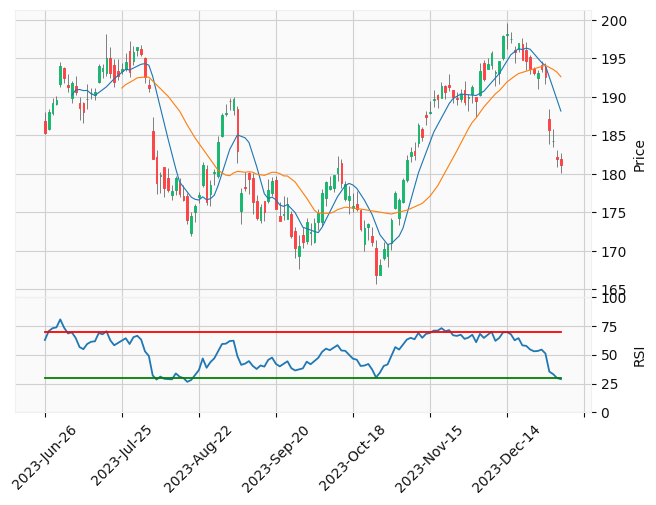

In [9]:
ap = mpf.make_addplot(df_x_rsi["rsi"], panel=1, ylim=[0, 100], ylabel="RSI")
rsi_70 = mpf.make_addplot(pd.Series(70, index=df_x_rsi.index), type='line', color='r', secondary_y=False, panel=1)
rsi_30 = mpf.make_addplot(pd.Series(30, index=df_x_rsi.index), type='line', color='g', secondary_y=False, panel=1)
mpf.plot(df_x_rsi, type="candle", mav=(fast_ma, slow_ma), addplot=[ap, rsi_70, rsi_30], style="yahoo")

MACD (Moving Average Convergence Divergence):

Concept: MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a stock's price. It consists of the MACD line (the difference between the 12-day and 26-day exponential moving averages) and the signal line (typically a 9-day exponential moving average of the MACD line). Bullish signals occur when the MACD line crosses above the signal line, indicating potential upward momentum, while bearish signals occur when the MACD line crosses below the signal line, indicating potential downward momentum.

Implementation: Calculate the MACD line and signal line based on the exponential moving averages and generate buy or sell signals based on their crossovers.

In [10]:
df_x_macd = df[-150: -1]
# df_x_macd.head()

In [11]:
macd_data = ta.macd(df_x_macd["close"]) 
macd_data.head()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2023-06-05,NaN,NaN,NaN
2023-06-06,NaN,NaN,NaN
2023-06-07,NaN,NaN,NaN
2023-06-08,NaN,NaN,NaN
2023-06-09,NaN,NaN,NaN


In [12]:
df_x_macd["macd"] = macd_data["MACD_12_26_9"]
df_x_macd["hist"] = macd_data["MACDh_12_26_9"]
df_x_macd["signal"] = macd_data["MACDs_12_26_9"]

df_x_macd.head()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\577354525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_macd["macd"] = macd_data["MACD_12_26_9"]
C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\577354525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_macd["hist"] = macd_data["MACDh_12_26_9"]
C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\577354525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,open,high,low,close,volume,macd,hist,signal
Date,,,,,,,,
2023-06-05,182.630005,184.949997,178.039993,179.580002,121946500,NaN,NaN,NaN
2023-06-06,179.970001,180.119995,177.429993,179.210007,64848400,NaN,NaN,NaN
2023-06-07,178.440002,181.210007,177.320007,177.820007,61944600,NaN,NaN,NaN
2023-06-08,177.899994,180.839996,177.460007,180.570007,50214900,NaN,NaN,NaN
2023-06-09,181.500000,182.229996,180.630005,180.960007,48870700,NaN,NaN,NaN


In [13]:
df_x_macd = df_x_macd.dropna()
# df_x_macd.isnull().sum()

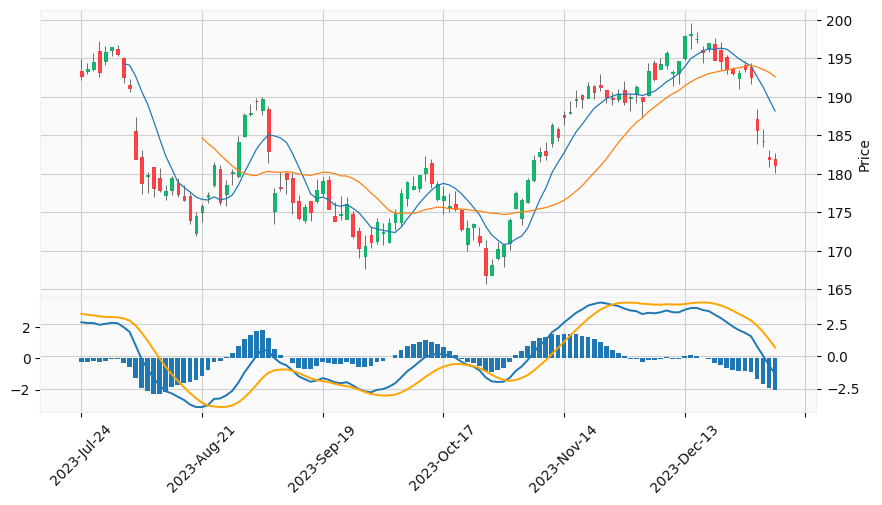

In [14]:
plots = [
    mpf.make_addplot(df_x_macd["macd"], panel=1, type="line"),
    mpf.make_addplot(df_x_macd["hist"], panel=1, type="bar"),
    mpf.make_addplot(df_x_macd["signal"], panel=1, type="line", color="orange")
    ]
mpf.plot(df_x_macd, type="candle", mav=(8,21), style="yahoo", figratio=(15,8), addplot=plots)

Bollinger Bands:

Concept: Bollinger Bands consist of a middle band (typically a 20-day simple moving average) and two outer bands (calculated as two standard deviations away from the middle band). The bands expand and contract based on volatility. When the price touches or crosses the upper band, it may indicate overbought conditions, suggesting a potential reversal to the downside. Conversely, when the price touches or crosses the lower band, it may indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the Bollinger Bands and monitor price interactions with the bands to generate buy or sell signals based on overbought or oversold conditions.

In [15]:
df_x_bbands = df[-150: -1]
df_x_bbands.head()

,open,high,low,close,volume
Date,,,,,
2023-06-05,182.630005,184.949997,178.039993,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,50214900
2023-06-09,181.500000,182.229996,180.630005,180.960007,48870700


In [17]:
df_x_bbands.ta.bbands(close="close", length=20, std=2, append=True)
df_x_bbands.head()

C:\Users\iamlo\AppData\Roaming\Python\Python311\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = result.iloc[:, i]


,open,high,low,close,volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,,,,,,
2023-06-05,182.630005,184.949997,178.039993,179.580002,121946500,NaN,NaN,NaN,NaN,NaN
2023-06-06,179.970001,180.119995,177.429993,179.210007,64848400,NaN,NaN,NaN,NaN,NaN
2023-06-07,178.440002,181.210007,177.320007,177.820007,61944600,NaN,NaN,NaN,NaN,NaN
2023-06-08,177.899994,180.839996,177.460007,180.570007,50214900,NaN,NaN,NaN,NaN,NaN
2023-06-09,181.500000,182.229996,180.630005,180.960007,48870700,NaN,NaN,NaN,NaN,NaN


In [18]:
df_x_bbands.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
BBL_20_2.0    19
BBM_20_2.0    19
BBU_20_2.0    19
BBB_20_2.0    19
BBP_20_2.0    19
dtype: int64

In [19]:
df_x_bbands.dropna(inplace=True)

C:\Users\iamlo\AppData\Local\Temp\ipykernel_3680\2718259327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_bbands.dropna(inplace=True)


In [20]:
df_x_bbands.head()

,open,high,low,close,volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200,176.709814,185.068501,193.427187,9.033073,0.942145
2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300,177.271278,185.656001,194.040723,9.032536,0.838354
2023-07-06,189.839996,192.020004,189.199997,191.809998,45094300,178.040993,186.286000,194.531007,8.851988,0.834990
2023-07-07,191.410004,192.669998,190.240005,190.679993,46778000,179.455501,186.928999,194.402498,7.996082,0.750953
2023-07-10,189.259995,189.990005,187.039993,188.610001,59922200,180.425598,187.330999,194.236400,7.372406,0.592609


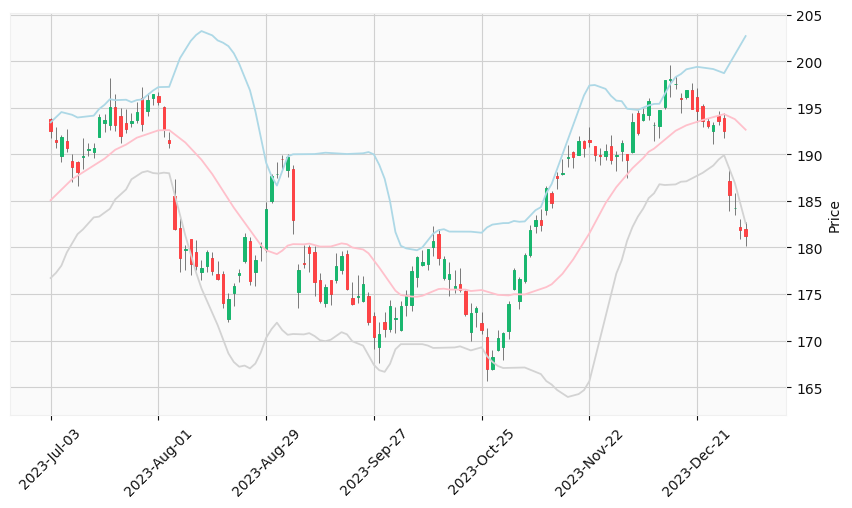

In [34]:
plots = [
    mpf.make_addplot(df_x_bbands["BBU_20_2.0"], color="lightblue"),
    mpf.make_addplot(df_x_bbands["BBL_20_2.0"], color="lightgray"),
    mpf.make_addplot(df_x_bbands["BBM_20_2.0"], color="pink")
    ]
mpf.plot(df_x_bbands, type="candle", style="yahoo", figratio=(15,8), addplot=plots)   